In [31]:
import pandas as pd
import numpy as np
from  sklearn.preprocessing import StandardScaler 
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from matplotlib import pyplot as plt

# Загрузка датасетов и подготовка данных

In [32]:
beverage_r = pd.read_csv("data/beverage_r.csv", sep=";", index_col='numb.obs')
live = pd.read_csv("data/Live.csv", sep=",")
live = live[live.columns[1:12]].drop_duplicates()

In [33]:
changes_status_type = { value : index for index, value in enumerate(live['status_type'].unique())}
live['status_type'] = live['status_type'].replace(changes_status_type)

In [34]:
changes_status_type

{'video': 0, 'photo': 1, 'link': 2, 'status': 3}

In [35]:
live['status_published'] = pd.to_datetime(live['status_published'])

In [36]:
live['day_of_week'] = np.sin(2 * np.pi * live['status_published'].dt.dayofweek  / 7)
live['hour'] =  np.sin(2 * np.pi * live['status_published'].dt.hour / 24)

In [39]:
live = live[[i for i in live.columns if i != 'status_published' ]].to_numpy()
live = live[np.random.choice(live.shape[0], size=300, replace=False)]

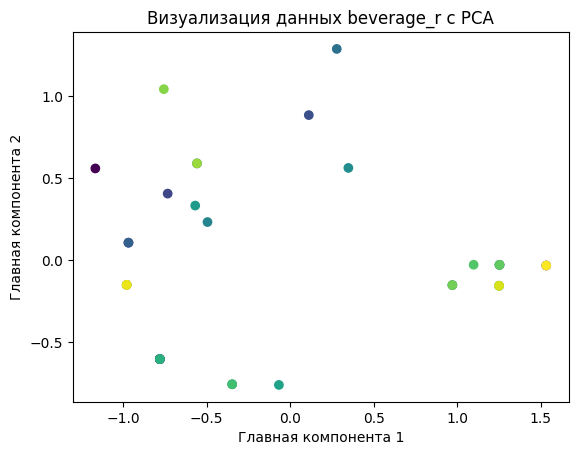

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(beverage_r)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=range(len(beverage_r)), cmap='viridis')
plt.title("Визуализация данных beverage_r с PCA")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

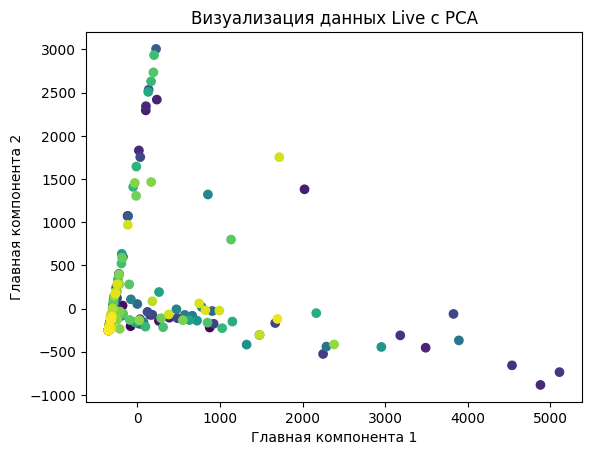

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(live)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=range(len(live)), cmap='viridis')
plt.title("Визуализация данных Live с PCA")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

In [42]:
sc = StandardScaler()
live = sc.fit_transform(live)
live = live[np.random.choice(live.shape[0], size=300, replace=False)]

# Применение кластеризации
## Иерархическая кластеризация 

In [43]:
import numpy as np
from my_hierarchy import EM_, Hierarchy_, DBSCAN_
from matplotlib import pyplot as plt
import seaborn as sns

In [44]:
h = Hierarchy_()
link = h.linkage(live)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [50.0, 50.0, 80.0, 80.0],
  [35.0, 35.0, 65.0, 65.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [110.0, 110.0, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [212.5, 212.5, 242.5, 242.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [227.5, 227.5, 273.75, 273.75],
  [180.0, 180.0, 250.625, 250.625],
  [125.0, 125.0, 215.3125, 215.3125],
  [305.0, 305.0, 315.0, 315.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.5],
  [310.0, 310.0, 333

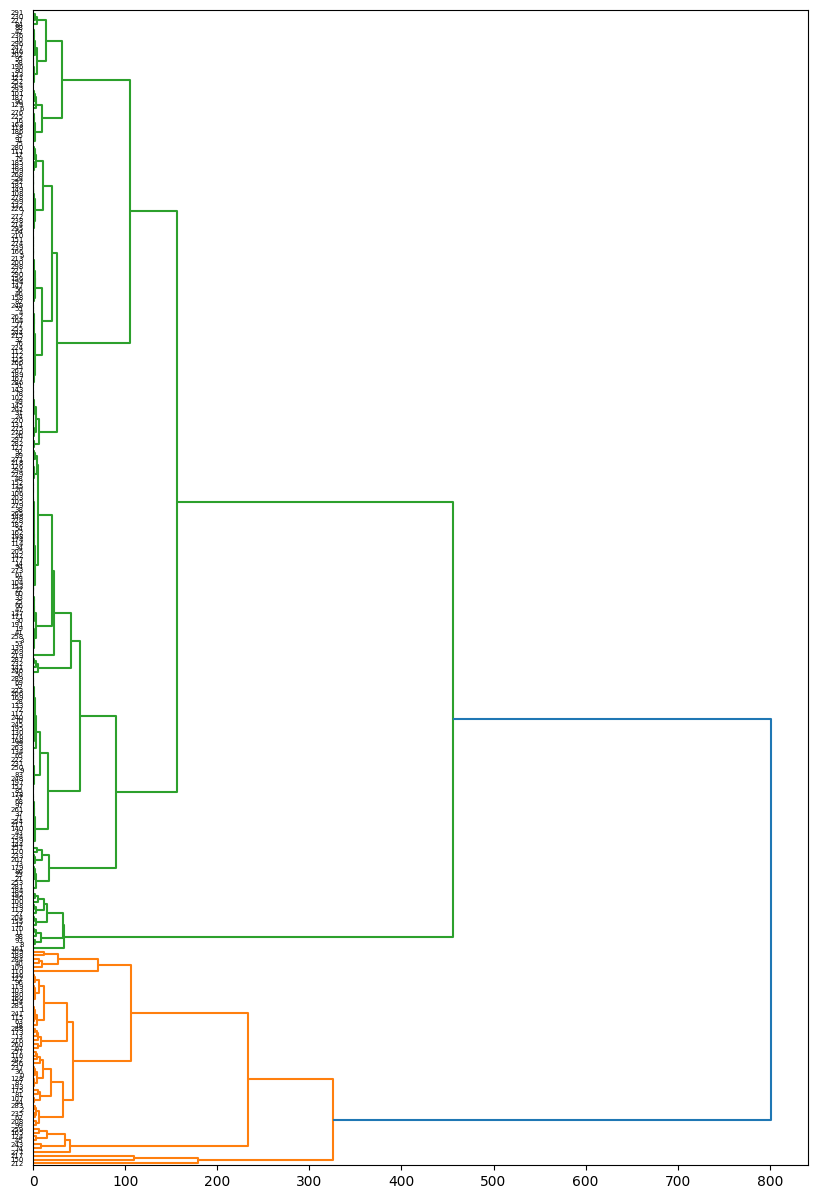

In [45]:
plt.figure(figsize=(10, 15))
dendrogram(link,orientation = 'right' )

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [62.5, 62.5, 92.5, 92.5],
  [21.25, 21.25, 77.5, 77.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [140.0, 140.0, 170.0, 170.0],
  [115.0, 115.0, 155.0, 155.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [192.5, 192.5, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [281.25, 281.25, 322.5, 322.5],
  [242.5, 242.5, 301.875, 301.875],
  [206.25, 206.25, 272.1875, 272.1875],
  [135.0, 135.0, 239

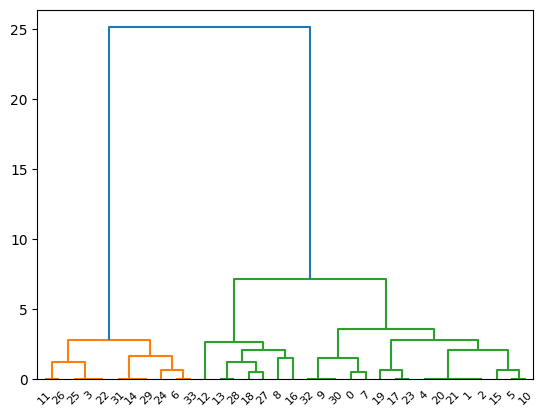

In [46]:
h = Hierarchy_()
link = h.linkage(beverage_r)
dendrogram(link)

Оптимальное число кластеров для датасетов:
1. Live - 3 кластеров. Похоже на кластеры с перемычками или даже ленточные
2. beverage_r - 3 кластера 

# Эксперименты

In [68]:
import time
from metrics import average_in_cluster, average_in_clusters
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [69]:
metrics = []
def metrics_calc(name, dataset, start, df, labels):
    data = {"название": name,
            "датасет": dataset,
            "время работы": time.time() - start,
            'average_in_cluster': average_in_cluster(df, labels),
            'average_clusters': average_in_clusters(df, labels),
            "длина датасета": len(df)}
    return data

## LIVE

### Иерархическая кластеризация

In [70]:
h = Hierarchy_()
start = time.time()
link = h.linkage(live)
labels = h.fclust(link, 3)
metrics.append(metrics_calc(Hierarchy_.__name__, "LIVE",  start, live, labels))

In [71]:
start = time.time()
link = linkage(live, 'ward', 'euclidean')
labels =  fcluster(link, criterion='maxclust', t = 3)
metrics.append(metrics_calc('Hierarchy',"LIVE",  start, live, labels))

### EM-алгоритм

In [72]:
start = time.time()
labels = EM_(live, 3).fit()
metrics.append(metrics_calc('EM_',"LIVE",  start, live, labels))

In [73]:
start = time.time()
labels = GaussianMixture(n_components =  3).fit(live).predict(live)
metrics.append(metrics_calc('GMM',"LIVE",  start, live, labels))

### DBSCAN

In [74]:
start = time.time()
analys = DBSCAN_(live, eps = 0.0001, m = 3)
analys.fit()
labels = analys.predict()
metrics.append(metrics_calc('DBSCAN_',"LIVE",  start, live, labels))

In [75]:
start = time.time()
db = DBSCAN(eps=0.0001, min_samples=3).fit(live)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
metrics.append(metrics_calc('DBSCAN',"LIVE",  start, live, labels))

## Beverage_r

### Иерархическая кластеризация

In [76]:
h = Hierarchy_()
start = time.time()
link = h.linkage(beverage_r)
labels = h.fclust(link, 3)
metrics.append(metrics_calc(Hierarchy_.__name__, "Beverage_r",  start, beverage_r, labels))

In [77]:
start = time.time()
link = linkage(beverage_r, 'ward', 'euclidean')
labels =  fcluster(link, criterion='maxclust', t = 3)
metrics.append(metrics_calc('Hierarchy',"Beverage_r",  start, beverage_r, labels))

### EM-алгоритм

In [78]:
start = time.time()
labels = EM_(beverage_r, 3).fit()
metrics.append(metrics_calc('EM_',"Beverage_r",  start, beverage_r, labels))

In [79]:
start = time.time()
labels = GaussianMixture(n_components =  3).fit(beverage_r).predict(beverage_r)
metrics.append(metrics_calc('GMM',"Beverage_r",  start, beverage_r, labels))

### DBSCAN

In [80]:
start = time.time()
analys = DBSCAN_(beverage_r, eps = 0.1, m = 4)
analys.fit()
labels = analys.predict()
metrics.append(metrics_calc('DBSCAN_',"Beverage_r",  start, beverage_r, labels))

In [81]:
start = time.time()
db = DBSCAN(eps=0.1, min_samples=4).fit(beverage_r)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
metrics.append(metrics_calc('DBSCAN',"Beverage_r",  start, beverage_r, labels))

In [83]:
pd.DataFrame(metrics)

,название,датасет,время работы,average_in_cluster,average_clusters,длина датасета
0,Hierarchy_,LIVE,3.919606,4.137753,5.830912,300
1,Hierarchy,LIVE,0.002351,4.137753,6.117347,300
2,EM_,LIVE,1.161977,1.815994,3.338574,300
3,GMM,LIVE,0.012254,3.984394,4.412180,300
4,DBSCAN_,LIVE,0.449572,3.968748,0.000000,300
5,DBSCAN,LIVE,0.005491,3.968748,0.000000,300
6,Hierarchy_,Beverage_r,0.039766,1.241189,1.880411,34
7,Hierarchy,Beverage_r,0.001020,1.141339,1.647361,34
8,EM_,Beverage_r,0.025036,1.363318,1.794674,34
9,GMM,Beverage_r,0.006549,1.096085,1.671523,34


In [82]:
pd.DataFrame(metrics).to_csv('metrics.csv', index=False)